# lo que aprenderas 
- el flujo de trabajo intermedio en ML:
1. dataset
  - cargar el dataset 
  - visualizacion y analisis del dataset 
  - sanity check
  - normalizacion 
2. diseño del modelo 
3. compilar el modelo 
4. entrenar el modelo 
5. evaluar el modelo
6. hacer predicciones con informacion de nosotros 

```
import tensorflow as tf

# 1. dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0

2. diseño del modelo  
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

#3. compilar el modelo 
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')
# 4. entrenar el modelo 
model.fit(training_images, training_labels, epochs=5)

# 5. evaluar el modelo 
model.evaluate(test_images, test_labels)

# 6. hacer predicciones con informacion de nosotros 
classifications = model.predict(mi_ropa)

```


- entender el porque de la arquitectura de la NN, haciendonos preguntas:
  - que pasa si añadimos mas neuronas a una capa densa oculta? aumenta el tiempo de training, pero aumento el accuracy. aunque pronto se llega  a la ley de rendimientos decrecientos que entre mas aumentamos menos obtenemos.
  - 2 reglas de oro para crear un modelo de clasificacion de imagenes:
    - para que sirve la capa flatten ? 1ra rule of thumb,  the first layer in your network should be the same shape as your data. nuestro input es una matriz (28,28) por lo cual necesitariamos 28 neuronas y 28 capas lo cual es ilogico, para esto mejor aplanamos los datos para ahora tener (748,1).  si quitamos la capa flatten nos daria un error de shape. 
    - por que hay 10 neuronas al final? 2nd rule of thumb, the number of neurons in the last layer should match the number of classes you are classifying for. si colocaras 9 neuronas en vez de 10 obtendrias un error cuando la NN detecte que hay un valor que no cabe en ninguna de las 9 categorias. 
    - cuantas capas ocultas se necesitan para resolver el problema ? esto depende de la complejidad de tu data, por ejemplo si nuestras imagenes fueran a color. si aumentamos otra capa a nuestro modelo no seria tan significativo la mejora. 
- que pasa si aumentamos o reducimos las epochs? llega un punto de quiebre en el cual la NN deja de mejorar su presicion en el entrenamiento y la evaluacion, en ese punto el programas sigue mejorando la presicion en con los datos de entrenamiento, pero deja de mejorar con los datos de evaluacion, en ese punto llegamos al overffiting, y no tiene sentido aumentar las epochs. 
- que pasa si no normalizamos la data ? la red funcionara, pero ahora aumentara el timpo de entrenamiento (70% aprox ) y disminuira el accuracy (no mucho) 
- para que sirve la fucnion softmax en la ultima capa? si hablamos de clasificacion, softmax permite convertir en una probabilidad el resultado de cada una de las neuronas de la ultima capa. takes a set of values, and effectively picks the biggest one. 

# funciones aprendidas 
- usar la herencia de objetos para interrumpir el entrenamiento cuando se alcance un accuracy
- como pedir metricas durante el entrenamiento

```
# creamos una herencia del objeto callback para indicar que cuando el accuracy se mayor a 0.9 se acabe la iteracion
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # aqui pedimos la metricas 
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks]) # aqui usamos el callback

```


- crear una funcion que nos muestre el indice con el valor mas alto de softmax     
https://stackoverflow.com/questions/48908641/how-to-get-a-single-value-from-softmax-instead-of-probability-get-confusion-ma

```
def class_n(c_id):
  clase = np.argmax(c_id)
  return clase
```




# Beyond Hello World, A Computer Vision Example
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill (exagerado) because it would have been easier to write the function Y=3x+1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

## Start Coding

Let's start with our import of TensorFlow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


We will train a neural network to recognize items of clothing from a common dataset called Fashion MNIST. You can learn more about this dataset [here](https://github.com/zalandoresearch/fashion-mnist).

It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale image. You can see some examples here:

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

# 1. - loading the dataset 
The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# 2. - sanity check and understanding of dataset 
What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

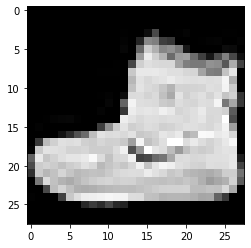

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap= "gray")
print(training_labels[0])
print(training_images[0])

# 3. normalization
You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

# 4. designing the model (create layer per layer)
Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


# 4. building(compiling) the model: asigment of loss and optimizer
The next thing to do, now the model is defined, is to actually build it. You do this by **compiling it with an optimizer and loss function** as before -- 
# 5. training the model
and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
# especificar el parametro accuracy permite visualizar en cada epoca la exactitud del modelo. 
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4964 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3726 - accuracy: 0.8660
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3362 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3103 - accuracy: 0.8869
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2933 - accuracy: 0.8920


Once it's done training -- you should see an **accuracy** value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

# 6. evaluating the model
But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 968us/step - loss: 0.3654 - accuracy: 0.8661


[0.365442156791687, 0.866100013256073]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

To explore further, try the below exercises:


# Exploration Exercises

## what a result means 
###Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?   
it is the label class

In [ ]:
import numpy as np

(10000, 10)
[8.8374776e-07 4.2049797e-07 5.1911400e-07 1.8586232e-06 4.4071504e-07
 1.8143214e-03 5.1603124e-06 2.6669079e-01 2.2507002e-06 7.3148334e-01]
prediccion:  5
valor real:  5


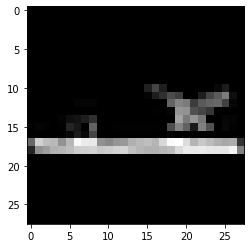

In [ ]:
classifications = model.predict(test_images)
print(classifications.shape)
print(classifications[0])
# creamos una funcion para visualizar el indice con el numero mas alto del vector output
# https://stackoverflow.com/questions/48908641/how-to-get-a-single-value-from-softmax-instead-of-probability-get-confusion-ma
def class_n(c_id):
  clase = np.argmax(c_id)
  return clase
num = 90
print('prediccion: ' ,class_n(classifications[num]))
print('valor real: ', test_labels[num])
plt.imshow(test_images[num], cmap='gray')
plt.show()

Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? 

In [ ]:
print(test_labels[0])

9


### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes



####Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.

For the 7, the probability was .999+, i.e. the neural network is telling us that it's almost certainly a 7.

### How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list




####Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

##Exercise 2. what if increase the neouron of a dense layer: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 



In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])




2.7.0
Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4667
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3580
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3186
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2968
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3640
[2.0981140e-06 1.2638622e-08 6.0401156e-08 1.0376595e-08 9.8474608e-08
 3.1910299e-03 2.2442107e-06 6.3645460e-02 1.0290076e-07 9.3315881e-01]
9


###Question 1. Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


####Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

the output answer pass from 9.7127974e-01 to 9.3315881e-01

##Exercise 3. the reason of a Flatten layer : 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, **but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data.** Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1(En este momento, nuestros datos son imágenes de 28x28, y 28 capas de 28 neuronas serían inviables, por lo que tiene más sentido 'aplanar' ese 28,28 en un 784x1.**texto en negrita**). Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

## Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5   
### the number of neurons in the last layer should match the number of classes you are classifying for
**You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for**. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

##Exercise 5. cuantas capas se necesitan para el modelo: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 
### si la data es mas compleja debes agregar mas capas a tu *red*

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

#Exercise 6 playing with the epochs(el overfitting): 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- **you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting'** which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

#Exercise 7. the importance of normalization : 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?    
podmeos ver como el tiempo  que tarda en entrenar en cada epoca aumenta de 3s a 7s y decrecio la accuracy ** por lo cual trabajar con datos no normalizados es posible, pero es mas eficiente normalizarlos.**

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
"""training_images=training_images/255.0
test_images=test_images/255.0"""
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.7.0
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 4.9271 - accuracy: 0.7658
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5396 - accuracy: 0.8160
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5223 - accuracy: 0.8267
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5152 - accuracy: 0.8246
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5733 - accuracy: 0.8116
[1.7524852e-09 2.4714922e-07 1.9823152e-15 6.2202555e-05 1.8646291e-12
 9.2018889e-03 2.4959817e-07 2.3889259e-01 3.1186977e-07 7.5184256e-01]
9


#Exercise 8. stop the trainig at the middle (complex using of objects): 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [ ]:
import tensorflow as tf
print(tf.__version__)
# creamos una herencia del objeto callback para indicar que cuando el accuracy se mayor a 0.9 se acabe la iteracion
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])




2.7.0
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4770 - accuracy: 0.8296
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3601 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3215 - accuracy: 0.8818
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2996 - accuracy: 0.8900
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2809 - accuracy: 0.8949
Epoch 6/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.2637 - accuracy: 0.9020
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2639 - accuracy: 0.9019
